# Assignment 2 - Kmeans

**Goal**

- Develop our version of K-Means.
- To compare the performance of different clustering algorithms.
- Demonstrate understanding of algorithms like K-Means, DBSCAN, and Hierarchical.
- Extend the functionality of the developed K-Means with additional parameters.
  
**Reference**

- Chicago Taxi Data - https://drive.google.com/file/d/1dQH8MlyQlHDwJ3lWtAqhjkCDIpT9VfYU/view - an approximately week-long subset of the full dataset ( full dataset - https://data.cityofchicago.org/Transportation/Taxi-Trips-2013-2023-/wrvz-psew/data)
- Mopsi Data subset - https://cs.uef.fi/sipu/datasets/MopsiLocationsUntil2012-Finland.txt
- Calculate euclidean distance - https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/

In [1]:
#importing required libraries that are used in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

from KMeans_my import KMeans_my

## 1. My KMeans Performance and its Comparison with sklearn KMeans

In [2]:
#Test on an simple input provided in Assignment PDF

X = np.array([[0, 0], [2, 2], [0, 2], [2, 0], [10, 10], [8, 8], [10, 8], [8, 10]])
Kmeans_my = KMeans_my(k=2)
Kmeans_my.fit(X)

(array([0, 0, 0, 0, 1, 1, 1, 1]),
 array([[1., 1.],
        [9., 9.]]))

**This Matches the expected output**

In [3]:
# Create sample data to test Kmeans implementation
X, cluster_assignments = make_blobs(n_samples=700, centers=4,cluster_std=0.60, random_state=0)

In [4]:
df = pd.DataFrame(X)
df.columns = ['col1','col2']
df

,col1,col2
0,-0.841778,7.866552
1,-1.215153,8.014846
2,1.843208,-0.072221
3,-1.352334,7.529442
4,1.773949,-0.423201
...,...,...
695,-1.353432,3.165605
696,-0.973870,8.412865
697,-1.831415,2.286754
698,-1.846398,3.304915


In [5]:
#Calling My KMeans
Kmeans_my = KMeans_my(k=4)
Kmeans_my.fit(X)

(array([0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 1, 3, 0, 3, 2, 1, 1, 0, 3, 0, 3, 3,
        2, 3, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 3, 0, 0, 3, 3, 1, 1, 3, 3, 2,
        3, 0, 0, 1, 0, 3, 1, 0, 1, 1, 1, 2, 3, 0, 1, 3, 2, 3, 2, 2, 0, 1,
        3, 2, 3, 3, 0, 3, 0, 0, 3, 2, 2, 1, 1, 1, 2, 2, 2, 3, 3, 0, 1, 2,
        1, 2, 0, 0, 1, 0, 0, 0, 2, 3, 0, 0, 0, 3, 2, 2, 3, 3, 3, 1, 1, 2,
        3, 1, 1, 3, 1, 1, 0, 0, 2, 2, 1, 3, 2, 0, 2, 0, 0, 2, 3, 0, 1, 0,
        2, 3, 1, 0, 0, 2, 1, 1, 2, 1, 3, 3, 2, 3, 2, 0, 2, 3, 1, 2, 1, 3,
        1, 0, 0, 3, 1, 2, 0, 1, 1, 2, 0, 0, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3,
        1, 3, 1, 1, 3, 0, 2, 0, 3, 2, 2, 2, 2, 3, 2, 0, 3, 1, 1, 0, 2, 2,
        2, 1, 3, 3, 3, 0, 1, 1, 2, 2, 3, 0, 3, 0, 2, 0, 1, 1, 1, 0, 3, 3,
        1, 0, 3, 0, 0, 2, 1, 3, 3, 1, 0, 0, 0, 0, 1, 2, 0, 3, 3, 0, 1, 0,
        0, 1, 1, 3, 3, 1, 3, 2, 2, 2, 0, 3, 2, 1, 0, 1, 0, 0, 0, 2, 1, 2,
        2, 0, 0, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 0, 1, 3, 3, 3, 1, 0, 1, 1,
        3, 0, 0, 3, 3, 2, 3, 3, 0, 1, 

In [6]:
unique, counts = np.unique(Kmeans_my.labels_, return_counts=True)
counts

array([175, 176, 174, 175])

In [7]:
#Calling sklearn Kmeans
kmeans_sklearn = KMeans(n_clusters=4, init='k-means++')
kmeans_sklearn.fit(X)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

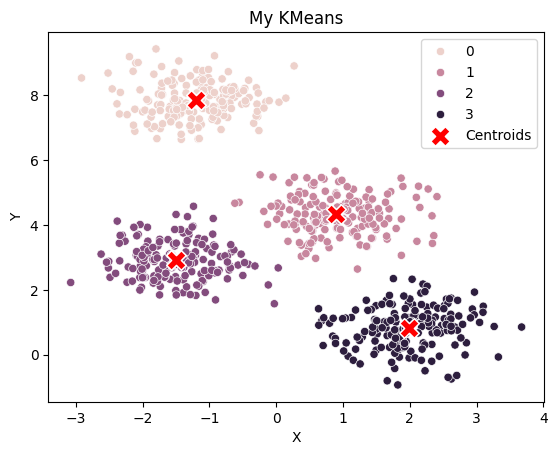

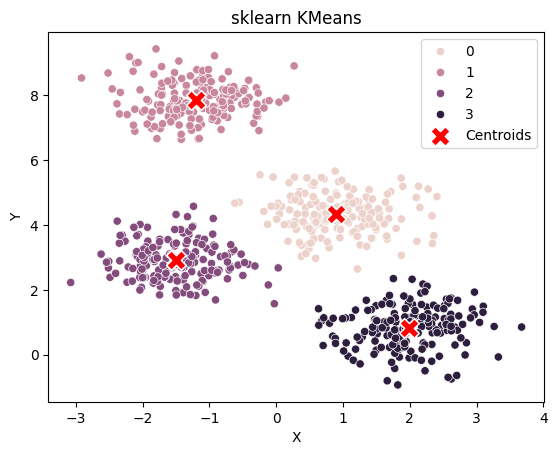

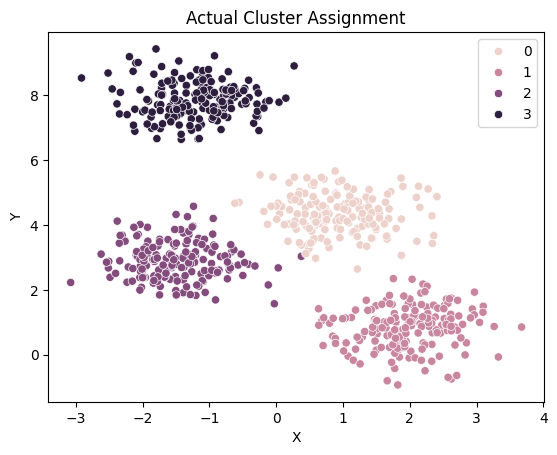

In [8]:
# Plotting 3 scatter plots for comparison between Kmeans and Original assignment
sns.scatterplot(data=df, x=df.col1, y=df.col2, hue=Kmeans_my.labels_)

centroids = Kmeans_my.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.title('My KMeans')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

sns.scatterplot(data=df, x=df.col1, y=df.col2, hue=kmeans_sklearn.labels_)

centroids = kmeans_sklearn.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.title('sklearn KMeans')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

sns.scatterplot(data=df, x=df.col1, y=df.col2, hue=cluster_assignments)

plt.title('Actual Cluster Assignment')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [9]:
#Performance comparison
randscore_my = adjusted_rand_score(cluster_assignments, Kmeans_my.labels_)
randscore_sklearn = adjusted_rand_score(cluster_assignments, kmeans_sklearn.labels_)
print("Adjusted Rand Index (sklearn KMeans vs. Expected):", randscore_sklearn)
print("Adjusted Rand Index (My KMeans vs. Expected):", randscore_my)

Adjusted Rand Index (sklearn KMeans vs. Expected): 0.9961850080391301
Adjusted Rand Index (My KMeans vs. Expected): 0.9961850080391301


### Observation for Kmeans performance
- My implementation and sklearn implementation gives the same output for given data and is 99.61% accurate in the above case.
- From the image above it can be seen that 1 point from cluster 2 is near cluster 0 in the original assignment, and based on Kmeans implementation it will be absorbed in the nearest cluster which is correct to happen.
- Adjusted Rand Index is used because it measures the similarity between two clusters and we know the original cluster assignment.
- Sometimes I observed that when random choice of centroid is bad my Kmeans perform at 60~70% based on adjusted rand index. I cannot recreate graph for it when I reran the kernel.
_________________________________________________________________________________________________________________________________________________

## 2. Run different clustering algorithms on given datasets

**What are we trying to achieve from this?**

- The reason why we chose the clustering algorithm(s)
- Any pre-processing of the data or any hyperparameter settings
- Output from the algorithms
- The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?

### Analysing Chicago Taxi Data with different clustering algorithms

In [10]:
df_taxi_whole = pd.read_csv('Taxi_Trips__2013-2023_.csv')
df_taxi_whole

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.20,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,660.0,2.70,NaN,NaN,32.0,7.0,...,0.0,13.00,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,480.0,0.00,NaN,NaN,8.0,24.0,...,0.0,9.75,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
3,2503e3944e5c82b89638447ad361638111129375,57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...,02/01/2023 12:15:00 AM,02/01/2023 12:45:00 AM,1620.0,0.00,1.703198e+10,NaN,76.0,NaN,...,28.0,91.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,40720025b84fa778c47d6637db01b1d8f2de2eabafa529...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,360.0,0.10,NaN,NaN,76.0,NaN,...,4.0,13.75,Cash,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,760.0,2.69,1.703183e+10,1.703132e+10,28.0,32.0,...,0.0,10.90,Mobile,Medallion Leasin,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,77.40,Credit Card,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,b31f46efa11263565e3dba91f26ff96b74516e8108ac56...,02/14/2023 10:30:00 AM,02/14/2020 06:00:00 PM,NaN,2.90,NaN,NaN,8.0,24.0,...,0.0,13.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
101786,7f24c5101df65952ef318f558b8b071989ff7c17,65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...,04/27/2023 11:15:00 AM,04/21/2019 09:30:00 PM,NaN,15.10,NaN,NaN,76.0,7.0,...,4.0,52.90,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


In [11]:
# Restricting clustering for pickup data from the dataset as it is mentioned in the assignment
# that we can work with only pickup or dropoff data for clustering.
df_taxi = df_taxi_whole[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']]
df_taxi

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
101783,41.885281,-87.657233
101784,41.899602,-87.633308
101785,41.899602,-87.633308
101786,41.980264,-87.913625


In [12]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pickup Centroid Latitude   95657 non-null  float64
 1   Pickup Centroid Longitude  95657 non-null  float64
dtypes: float64(2)
memory usage: 1.6 MB


In [13]:
df_taxi.describe()

,Pickup Centroid Latitude,Pickup Centroid Longitude
count,95657.000000,95657.000000
mean,41.898703,-87.689956
std,0.064621,0.104274
min,41.660136,-87.913625
25%,41.878866,-87.695013
50%,41.895033,-87.642649
75%,41.949829,-87.626211
max,42.015934,-87.534903


In [14]:
#droping NaN columns for clustering
df_taxi = df_taxi.dropna().reset_index(drop=True)
df_taxi

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
95652,41.878866,-87.625192
95653,41.885281,-87.657233
95654,41.899602,-87.633308
95655,41.899602,-87.633308


In [15]:
df_taxi.isna().sum() #Check for Empty after droping NaN

Pickup Centroid Latitude     0
Pickup Centroid Longitude    0
dtype: int64

<Axes: xlabel='Pickup Centroid Longitude', ylabel='Count'>

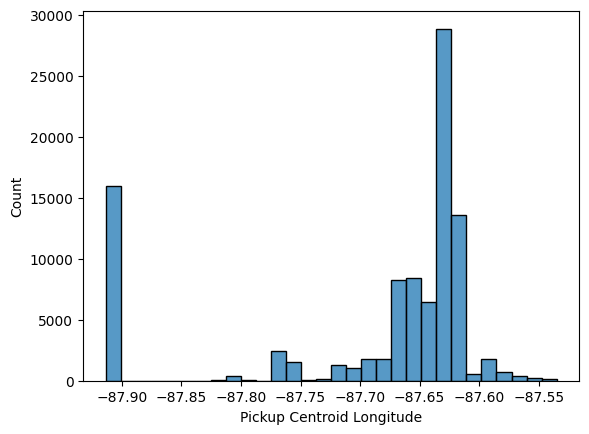

In [16]:
sns.histplot(data = df_taxi, x = df_taxi['Pickup Centroid Longitude'], bins = 30)

<Axes: xlabel='Pickup Centroid Latitude', ylabel='Count'>

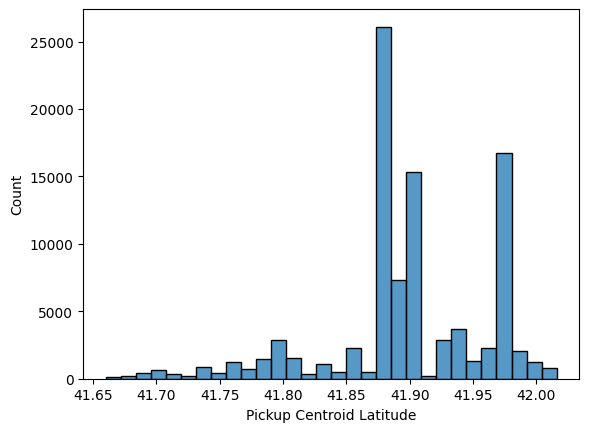

In [17]:
sns.histplot(data = df_taxi, x = df_taxi['Pickup Centroid Latitude'], bins = 30)

[Text(0.5, 1.0, 'Taxi Pickup')]

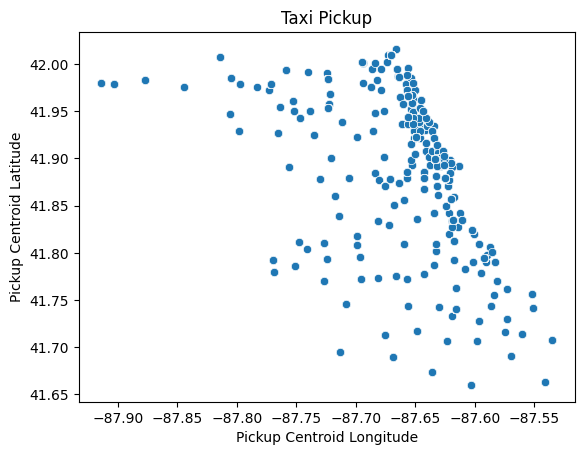

In [18]:
sns.scatterplot(data = df_taxi, x = df_taxi['Pickup Centroid Longitude'], y = df_taxi['Pickup Centroid Latitude']).set(title = "Taxi Pickup")

In [19]:
df_taxi.corr()

,Pickup Centroid Latitude,Pickup Centroid Longitude
Pickup Centroid Latitude,1.000000,-0.587282
Pickup Centroid Longitude,-0.587282,1.000000


#### EDA for Taxi Data
**Note:** Did data analysis only on Picked up data because we are only using that in this portion of assignment.
- There were 101788 rows and out of which 6171 data was not available, which we have dropped for clustering analysis.
- latitude and longitude are of float type.
- latitude and longitude are negatively correlated with -0.58 value. (According to me it is neither strong nor weak). And we can see this in the scatterplot as well.
- longitude seems to be left skewed normally distributed being skewed with exception at longitude on left of -87.9.
- latitude doesnot seem to follow normal or power law distribution as it has 2 highs.
- Based on dataset we know it is data for chicago and using the scatterplot we confirm it seems somewhat like chicago.
- And the latitude and longitude seems to be in proper range for chicago data. (confirmed on google maps)

In [20]:
# Scaling the data for clustering
scaler = StandardScaler()
df_taxi_scaled = scaler.fit_transform(df_taxi)

In [21]:
# init k-means++ is used for better centroid initialization at start
kmeans_taxi = KMeans(n_clusters=4, init='k-means++')
kmeans_taxi.fit(df_taxi_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

[Text(0.5, 1.0, 'Kmeans - 4 clusters on taxi data')]

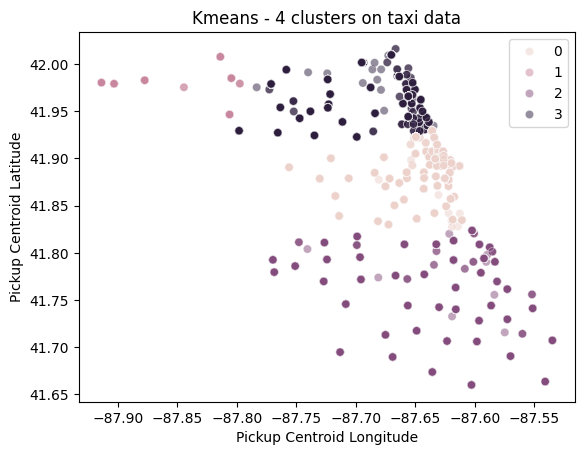

In [22]:
sns.scatterplot(data=df_taxi, x=df_taxi['Pickup Centroid Longitude'], y=df_taxi['Pickup Centroid Latitude'] , 
                hue=kmeans_taxi.labels_, alpha = 0.5).set(title='Kmeans - 4 clusters on taxi data')

In [23]:
#Kmeans performance analysis
silhouette_score_taxi = silhouette_score(df_taxi_scaled, kmeans_taxi.labels_)

print("Silhouette Score for Taxi data for Kmeans with cluster size 4 is : ", silhouette_score_taxi)

Silhouette Score for Taxi data for Kmeans with cluster size 4 is :  0.7031324453131509


In [24]:
kmeans_taxi.inertia_

17723.413073497228

In [25]:
# finding inertia for different cluster sizes for elbow method to know what size cluster would be best
kminertia = pd.DataFrame(data=[], index=range(2,14), columns=['inertia'])

for k in range(2,14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_taxi_scaled)
    kminertia.loc[k] = kmeans.inertia_

kminertia

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

,inertia
2,73941.485572
3,33720.966698
4,17723.413073
5,12608.698886
6,9679.24943
7,8112.149871
8,6716.966409
9,5725.543722
10,4814.881381
11,4074.810972


[Text(0.5, 1.0, 'Taxi Kmeans Inertia')]

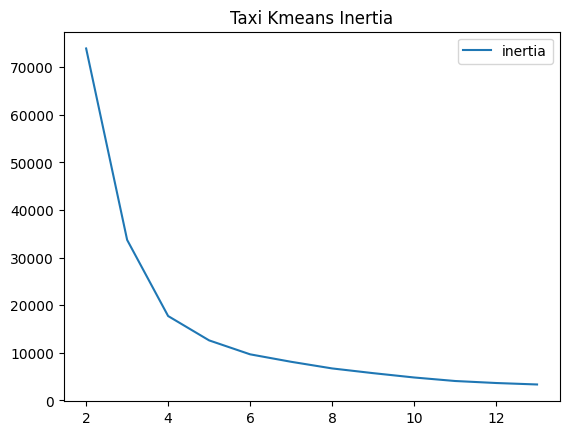

In [26]:
kminertia.plot().set(title = "Taxi Kmeans Inertia")

Observation:

- Using elbow method around k = 4, 5 would be best for Kmeans clustering

In [27]:
# from above observation checking for n_clusters = 5
kmeans_taxi2 = KMeans(n_clusters=5, init='k-means++')
kmeans_taxi2.fit(df_taxi_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

[Text(0.5, 1.0, 'Kmeans - 5 clusters on taxi data')]

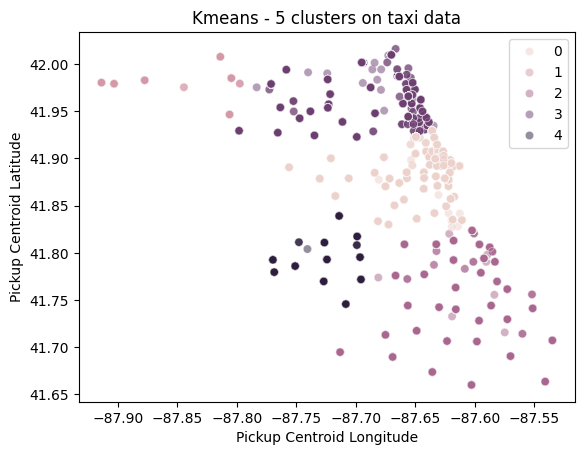

In [28]:
sns.scatterplot(data=df_taxi, x=df_taxi['Pickup Centroid Longitude'], y=df_taxi['Pickup Centroid Latitude'] , 
                hue=kmeans_taxi2.labels_, alpha = 0.5).set(title='Kmeans - 5 clusters on taxi data')

In [29]:
#kmeans performance analysis for cluster = 5
silhouette_score_taxi2 = silhouette_score(df_taxi_scaled, kmeans_taxi2.labels_)

print("Silhouette Score for Taxi data for Kmeans with cluster size 5 is : ", silhouette_score_taxi2)

Silhouette Score for Taxi data for Kmeans with cluster size 5 is :  0.7186350053225591


- Comparing Silhouette score for cluster size 4 and 5 we can see that there is no big change in score.

In [30]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(df_taxi_scaled)
np.unique(dbscan.labels_) # how many clusters are formed

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

[Text(0.5, 1.0, 'Taxi DBSCAN eps=0.2')]

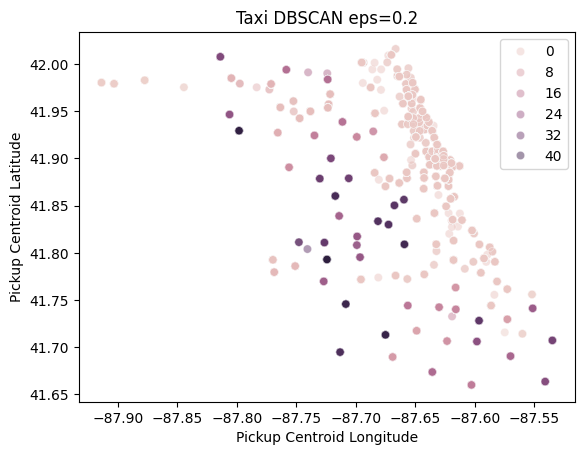

In [31]:
sns.scatterplot(data=df_taxi, x=df_taxi['Pickup Centroid Longitude'], y=df_taxi['Pickup Centroid Latitude'] , 
                hue=dbscan.labels_, alpha = 0.5).set(title = "Taxi DBSCAN eps=0.2")

In [32]:
# testing for different eps and min_samples
dbscan2 = DBSCAN(eps=0.1, min_samples=5)
dbscan2.fit(df_taxi_scaled)
np.unique(dbscan2.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89])

[Text(0.5, 1.0, 'Taxi DBSCAN eps = 0.1')]

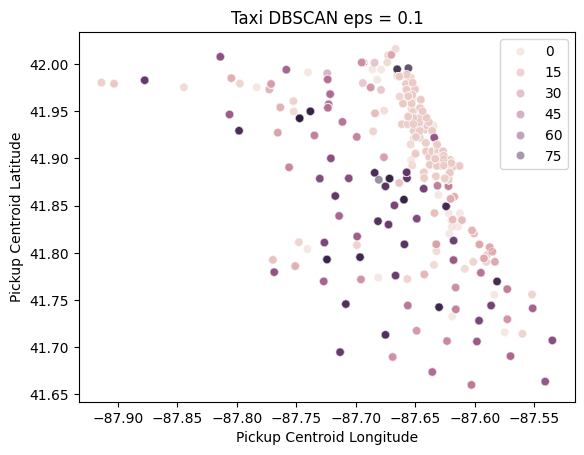

In [33]:
sns.scatterplot(data=df_taxi, x=df_taxi['Pickup Centroid Longitude'], y=df_taxi['Pickup Centroid Latitude'] , 
                hue=dbscan2.labels_, alpha = 0.5).set(title = "Taxi DBSCAN eps = 0.1")

In [34]:
#DBSCAN performance analysis
silhouette_score_dbscan_taxi = silhouette_score(df_taxi_scaled, dbscan.labels_)
silhouette_score_dbscan_taxi2 = silhouette_score(df_taxi_scaled, dbscan2.labels_)

print("Silhouette Score for Taxi data for DBScan with eps 0.2 and min sample 10 : ", silhouette_score_dbscan_taxi)

print("Silhouette Score for Taxi data for DBScan with eps 0.1 and min sample 5  ", silhouette_score_dbscan_taxi2)

Silhouette Score for Taxi data for DBScan with eps 0.2 and min sample 10 :  0.1424240889787089
Silhouette Score for Taxi data for DBScan with eps 0.1 and min sample 5   0.4185291672625405


In [35]:
#Hirarchical Clustering
#from scipy.cluster.hierarchy import linkage, dendrogram

#plt.figure(figsize=(50,5))
#dend = dendrogram(linkage(df_taxi_scaled, method='ward'))
#plt.show()

In [36]:
#from sklearn.cluster import AgglomerativeClustering

#hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
#labels = hierarchical_cluster.fit_predict(df_taxi_scaled)

#sns.scatterplot(data = df_mopsi, x =df_taxi.x, y = df_taxi.y, hue=labels, alpha = 0.5)

#### Note / Observation about Hirarchical clustering
I tried running Hierarchical clustering but it gave following error
- The kernel for kmeans-VishalDani1602/Assignment 2 - Clustering.ipynb appears to have died. It will restart automatically.
- My Observation from this is maybe due to data being large Hierarchical clustering is not a way to go as each point tries to find distance from all other points.

#### Observation from different Clustering Algorithms on Taxi Data

1. **The reason why we chose the clustering algorithm(s)**
- I chose **Kmeans** because data seemed like it can be grouped in 4 different sections and so I tried with clusters = 4, which gave very good result of silhouette score.
- Then I tried **DBSCAN** as it handles outliers well but it is observed that there are many small clusters and thus give many small clustering and thus have lower silhouette score.
- Also, for **Hierarchical** clustering, my system crashes which I made a note of and commented on the code for what I tried.
2. **Any pre-processing of the data or any hyperparameter settings**
- I dropped various columns and only worked with pickup latitude and longitude. And also i tried with various eps, min_sample and n_clusters which has been observed above.
- Used StandardScaler to scale the data.
3. **Output from the algorithms**
- Plots for the algorithms can be seen after each step in the above code.
4. **The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?**
- I used Silhouette score to evaluate the output and it aligned with my guess being Kmeans would be better, but still silhouette might favor Kmeans which we talked in class as this score is doesnot favor irregular shapes while DBSCAN is generally better when we have some irregular shape.

### Analysing Mopsi Data with different clustering algorithms

In [37]:
df_mopsi = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', delimiter='\t', header=None)
df_mopsi.columns = ["latitude", "longitude"]
df_mopsi

,latitude,longitude
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


- Seems like latitude and longitude data is not correctly formatted and needs to be divided by 10000 to get correct values. we will do that in next step.

In [38]:
df_mopsi['latitude'] = df_mopsi['latitude']/10000
df_mopsi['longitude'] = df_mopsi['longitude']/10000
df_mopsi

,latitude,longitude
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437
...,...,...
13462,62.6042,29.7444
13463,62.5977,29.7443
13464,62.6050,29.7404
13465,62.5995,29.7426


In [39]:
df_mopsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   13467 non-null  float64
 1   longitude  13467 non-null  float64
dtypes: float64(2)
memory usage: 210.6 KB


In [40]:
df_mopsi.describe()

,latitude,longitude
count,13467.000000,13467.000000
mean,62.509478,28.900467
std,0.784433,2.039943
min,59.924700,21.201600
25%,62.593000,29.616400
50%,62.601800,29.744800
75%,62.619200,29.779650
max,69.783500,31.432800


<Axes: xlabel='longitude', ylabel='Count'>

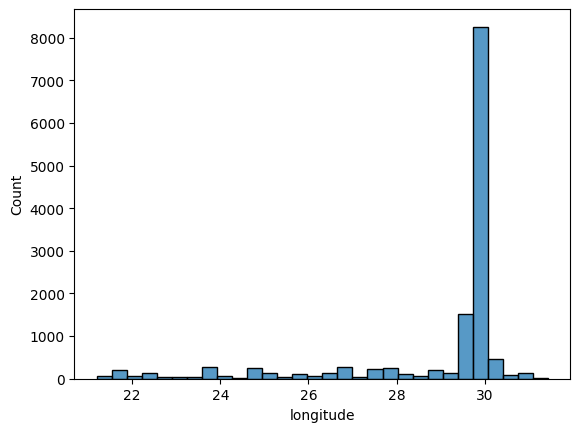

In [41]:
sns.histplot(data = df_mopsi, x = df_mopsi.longitude, bins = 30)

<Axes: xlabel='latitude', ylabel='Count'>

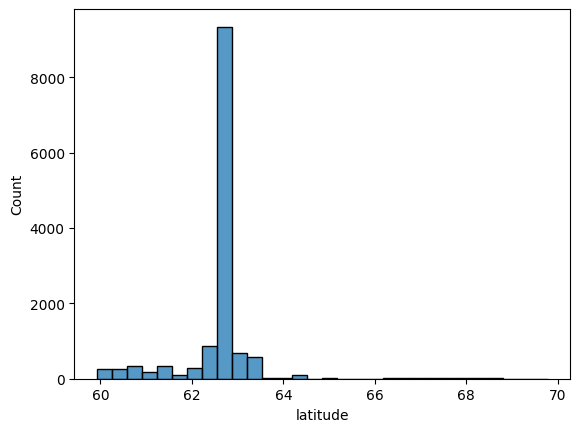

In [42]:
sns.histplot(data = df_mopsi, x = df_mopsi.latitude, bins=30)

[Text(0.5, 1.0, 'Mopsi Data')]

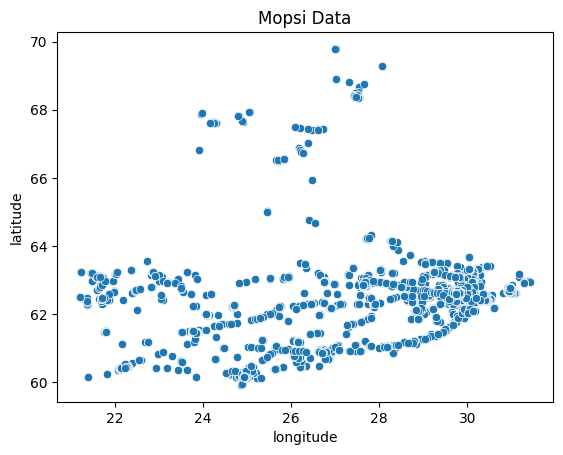

In [43]:
sns.scatterplot(data = df_mopsi, x = df_mopsi.longitude, y = df_mopsi.latitude).set(title = 'Mopsi Data')

In [44]:
df_mopsi.corr()

,latitude,longitude
latitude,1.000000,0.351543
longitude,0.351543,1.000000


#### EDA for Mopsi Data

- There are 13467 rows with no data missing. longitude and latitude seemed to be incorrectly formatted and that we did solve by dividing by 10000 and get proper longitude and latitude.
- After changing latitude and longitude to proper format the values are in float format.
- Correlation between latitude and longitude is positive (0.35)
- longitude seems to be left skewed power law distributed.
- latitude seems to be normally distributed.
- Based on dataset we know it is data for finland.
- And the latitude and longitude seems to be in proper range for finland data. (confirmed on google maps)

In [45]:
#scale mopsi data
df_mopsi_scaled = scaler.fit_transform(df_mopsi) # scale mopsi data

In [46]:
kmeans_mopsi = KMeans(n_clusters=4, init='k-means++')
kmeans_mopsi.fit(df_mopsi_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

[Text(0.5, 1.0, 'Mopsi Kmeans cluster = 4')]

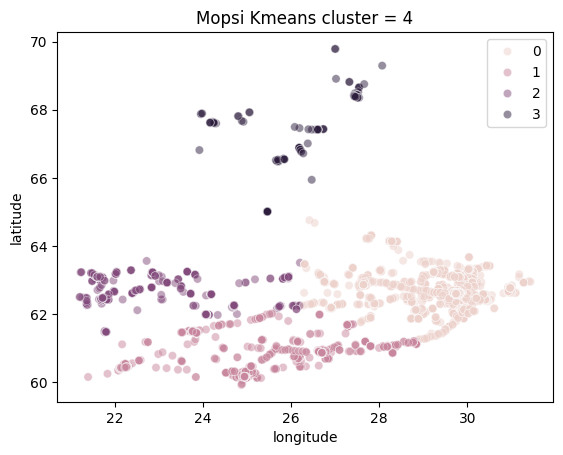

In [47]:
sns.scatterplot(data = df_mopsi,x = df_mopsi.longitude, y = df_mopsi.latitude,  
                hue=kmeans_mopsi.labels_, alpha = 0.5).set(title = "Mopsi Kmeans cluster = 4")

In [48]:
kmeans_mopsi.inertia_

4428.841264442882

In [49]:
kminertia_mopsi = pd.DataFrame(data=[], index=range(2,14), columns=['inertia'])

for k in range(2,14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_mopsi_scaled)
    kminertia_mopsi.loc[k] = kmeans.inertia_

kminertia_mopsi

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

,inertia
2,11542.15471
3,7143.914646
4,4428.809481
5,3497.376861
6,2790.690521
7,2175.726116
8,1694.265354
9,1366.675678
10,1151.443787
11,958.508886


[Text(0.5, 1.0, 'Mopsi Kmeans Inertia')]

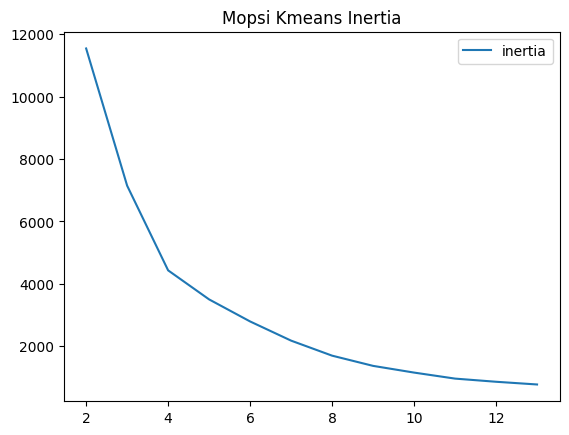

In [50]:
kminertia_mopsi.plot().set(title = "Mopsi Kmeans Inertia")

Observation:

- Using elbow method around k = 4 and 6 would be best for Kmeans clustering

In [51]:
kmeans_mopsi2 = KMeans(n_clusters=6, init='k-means++')
kmeans_mopsi2.fit(df_mopsi_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

[Text(0.5, 1.0, 'Mopsi Kmeans with 6 clusters')]

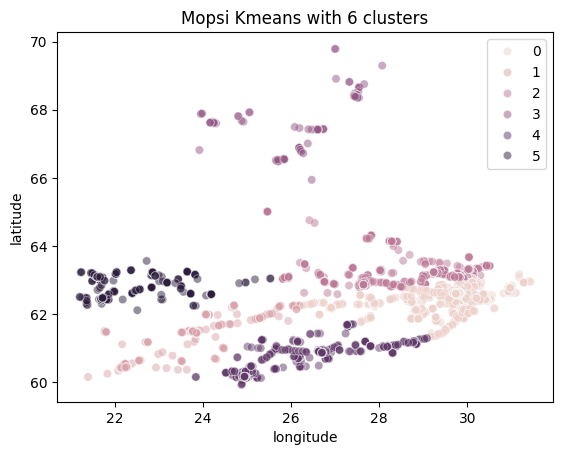

In [52]:
sns.scatterplot(data = df_mopsi,x = df_mopsi.longitude, y = df_mopsi.latitude,  hue=kmeans_mopsi2.labels_, alpha = 0.5).set(title = "Mopsi Kmeans with 6 clusters")

In [53]:
#kmeans performance analysis
silhouette_score_kmeans_mopsi = silhouette_score(df_mopsi_scaled, kmeans_mopsi.labels_)
silhouette_score_kmeans_mopsi2= silhouette_score(df_mopsi_scaled, kmeans_mopsi2.labels_)

print("Silhouette Score for Mopsi data for KMeans with number of cluster = 4 : ", silhouette_score_kmeans_mopsi)

print("Silhouette Score for Mopsi data for KMeans with number of cluster = 6 : ", silhouette_score_kmeans_mopsi2)

Silhouette Score for Mopsi data for KMeans with number of cluster = 4 :  0.8265734538914362
Silhouette Score for Mopsi data for KMeans with number of cluster = 6 :  0.7358277188956904


In [54]:
# DBSCAN clustering
dbscan_mopsi = DBSCAN(eps=0.3, min_samples=5)
dbscan_mopsi.fit(df_mopsi_scaled)
np.unique(dbscan_mopsi.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

[Text(0.5, 1.0, 'Mopsi DBSCAN eps 0.3')]

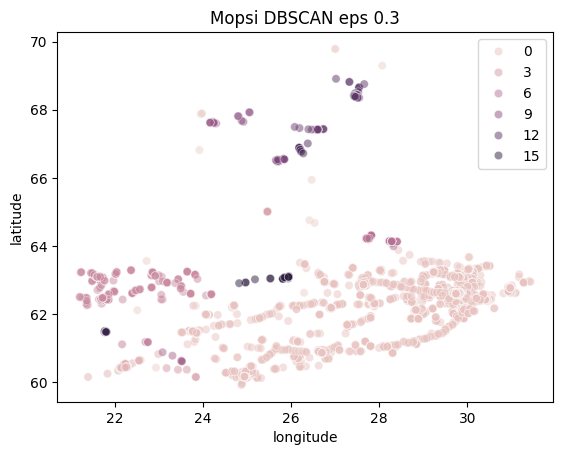

In [55]:
sns.scatterplot(data = df_mopsi,x = df_mopsi.longitude, y = df_mopsi.latitude,  
                hue=dbscan_mopsi.labels_, alpha = 0.5).set(title = "Mopsi DBSCAN eps 0.3")

In [56]:
# DBSCAN clustering with different eps
dbscan_mopsi2 = DBSCAN(eps=0.5, min_samples=10)
dbscan_mopsi2.fit(df_mopsi_scaled)
np.unique(dbscan_mopsi2.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

[Text(0.5, 1.0, 'Mopsi DBSCAN eps 0.5')]

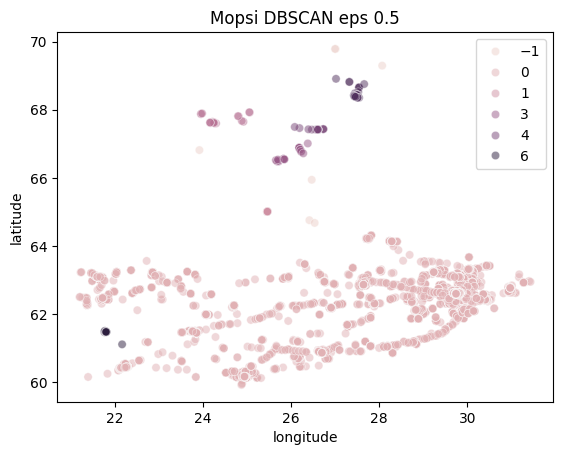

In [57]:
sns.scatterplot(data = df_mopsi,x = df_mopsi.longitude, y = df_mopsi.latitude,  
                hue=dbscan_mopsi2.labels_, alpha = 0.5).set(title = "Mopsi DBSCAN eps 0.5")

In [58]:
#dbscan performance analysis
silhouette_score_dbscan_mopsi = silhouette_score(df_mopsi_scaled, dbscan_mopsi.labels_)
silhouette_score_dbscan_mopsi2 = silhouette_score(df_mopsi_scaled, dbscan_mopsi2.labels_)

print("Silhouette Score for Mopsi data for DBScan with eps 0.3 and min sample 5 : ", silhouette_score_dbscan_mopsi)

print("Silhouette Score for Mopsi data for DBScan with eps 0.5 and min sample 10  ", silhouette_score_dbscan_mopsi2)

Silhouette Score for Mopsi data for DBScan with eps 0.3 and min sample 5 :  0.560643808526042
Silhouette Score for Mopsi data for DBScan with eps 0.5 and min sample 10   0.6142057349851491


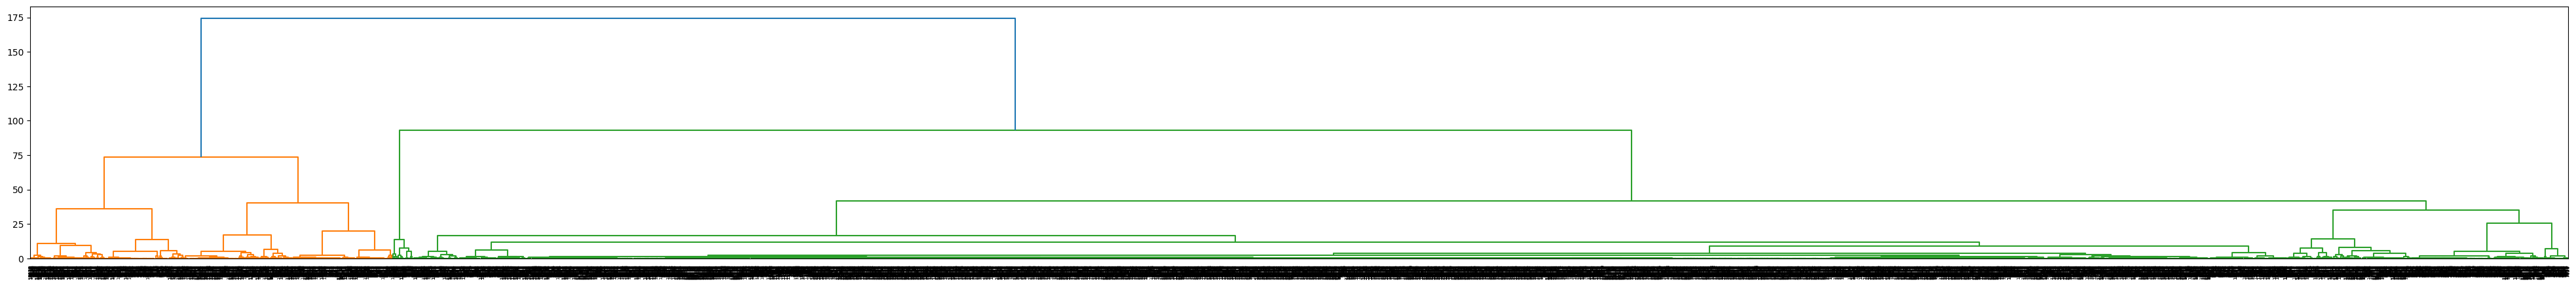

In [59]:
plt.figure(figsize=(50,5))
dend = dendrogram(linkage(df_mopsi_scaled, method='ward'))
plt.show()

[Text(0.5, 1.0, 'Mopsi Hierarchical clusters = 3')]

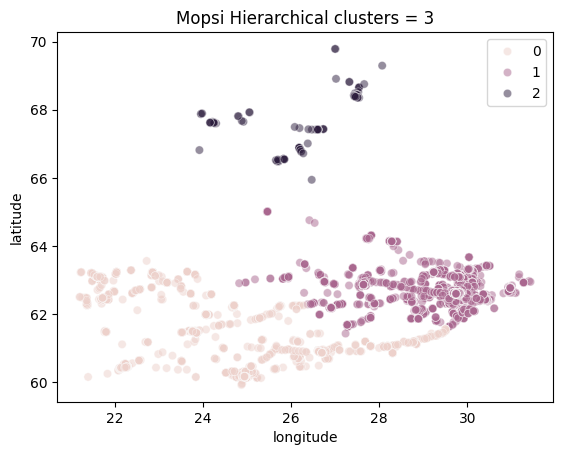

In [60]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_mopsi_scaled)

sns.scatterplot(data = df_mopsi, x =df_mopsi.longitude, y = df_mopsi.latitude, 
                hue=labels, alpha = 0.5).set(title = "Mopsi Hierarchical clusters = 3")

In [61]:
#hierarchical performance analysis
silhouette_score_hierarchical_mopsi = silhouette_score(df_mopsi_scaled, labels)

print("Silhouette Score for Mopsi data for hierarchical clustering number of cluster = 3 is : ", silhouette_score_hierarchical_mopsi)

Silhouette Score for Mopsi data for hierarchical clustering number of cluster = 3 is :  0.814136225090953


#### Observation from different Clustering Algorithms on Mopsi Data

1. **The reason why we chose the clustering algorithm(s)**
- I chose **Kmeans** because data seemed like it can be grouped in 2 different sections top half and bottom half.
- Then I tried **DBSCAN** as it I thought the bottom half will be 1 cluster and others will be taken as outliers.
- Then I tried **Hierarchical** clustering, as it is based on distance from each point to other.
2. **Any pre-processing of the data or any hyperparameter settings**
- I made the data to be in correct latitude and longitude format.
- Tried various parameters to observe what parameters are good for clustering.
- Used StandardScaler to scale the data.
3. **Output from the algorithms**
- Plots for the algorithms can be seen after each step in the above code.
4. **The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?**
- I used Silhouette score to evaluate the output. My expectation was DBSCAN would be better but based on this score result Kmeans and hierarchical clustering are better.

## 3. Extended KMeans Analysis
- Have balanced parameter, so that clusters have equal amount of points.

In [62]:
#trying with max iteration as 1
Kmeans_my_balanced = KMeans_my(k=4, balanced=True, max_iter=1)
Kmeans_my_balanced.fit(X)

(array([2, 3, 1, 0, 1, 2, 1, 1, 1, 2, 3, 1, 3, 1, 0, 3, 3, 2, 1, 3, 0, 1,
        3, 1, 2, 0, 3, 0, 3, 0, 2, 3, 0, 2, 1, 3, 2, 0, 0, 3, 3, 1, 0, 0,
        0, 3, 0, 3, 3, 0, 3, 2, 0, 0, 1, 2, 0, 3, 3, 1, 1, 0, 3, 1, 1, 3,
        0, 2, 0, 1, 2, 1, 2, 2, 1, 3, 1, 3, 1, 3, 2, 0, 0, 0, 1, 2, 0, 2,
        2, 0, 0, 3, 3, 1, 2, 2, 1, 0, 3, 3, 1, 1, 1, 1, 1, 0, 1, 1, 0, 3,
        0, 3, 2, 1, 0, 0, 2, 2, 1, 3, 3, 0, 2, 2, 3, 2, 0, 1, 1, 2, 3, 2,
        2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 3, 3, 0, 1, 0, 2, 3, 1,
        3, 0, 2, 0, 3, 3, 1, 1, 3, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0,
        3, 0, 3, 3, 1, 2, 2, 1, 1, 2, 1, 3, 2, 0, 3, 0, 1, 3, 0, 2, 0, 3,
        2, 3, 1, 0, 1, 1, 3, 2, 3, 3, 1, 3, 1, 3, 2, 0, 3, 3, 3, 2, 0, 1,
        0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 2, 2, 2, 3, 0, 2, 1, 1, 0, 3, 2,
        2, 0, 3, 1, 0, 1, 0, 3, 2, 1, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 1, 2,
        2, 2, 0, 0, 1, 0, 3, 3, 2, 1, 2, 1, 3, 2, 3, 0, 0, 1, 3, 3, 0, 2,
        1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 

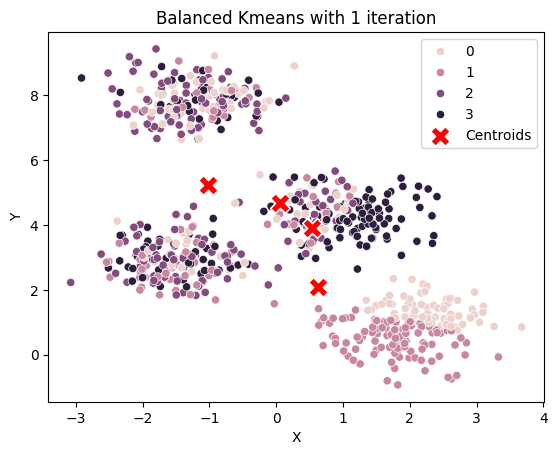

In [63]:
sns.scatterplot(data=df, x=df.col1, y=df.col2, hue=Kmeans_my_balanced.labels_)

centroids = Kmeans_my_balanced.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.title('Balanced Kmeans with 1 iteration')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [64]:
unique, counts = np.unique(Kmeans_my_balanced.labels_, return_counts=True)
counts

array([175, 175, 175, 175])

In [65]:
#run with default parameters
Kmeans_my_balanced2 = KMeans_my(k=4, balanced=True)
Kmeans_my_balanced2.fit(X)

(array([2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 3, 0, 2, 0, 1, 3, 3, 2, 0, 2, 0, 0,
        1, 0, 1, 2, 3, 1, 1, 1, 1, 3, 2, 3, 0, 2, 2, 0, 0, 3, 3, 0, 0, 1,
        0, 2, 2, 3, 2, 0, 3, 2, 3, 3, 3, 1, 0, 2, 3, 0, 1, 0, 1, 1, 2, 3,
        0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 3, 3, 3, 1, 1, 1, 0, 0, 2, 3, 1,
        3, 1, 2, 2, 3, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 3, 3, 1,
        0, 3, 3, 0, 3, 3, 2, 2, 1, 1, 3, 0, 1, 2, 1, 2, 2, 1, 0, 2, 3, 2,
        1, 0, 3, 2, 2, 1, 3, 3, 1, 3, 0, 0, 1, 0, 1, 2, 1, 0, 3, 1, 3, 0,
        3, 2, 2, 0, 3, 1, 2, 3, 3, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        3, 0, 3, 3, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 3, 3, 2, 1, 1,
        1, 3, 0, 0, 0, 2, 3, 3, 1, 1, 0, 2, 0, 2, 1, 2, 3, 3, 3, 2, 0, 0,
        3, 2, 0, 2, 2, 1, 3, 0, 0, 3, 2, 2, 2, 2, 3, 1, 2, 0, 0, 2, 3, 2,
        2, 3, 3, 0, 0, 3, 0, 1, 1, 1, 2, 0, 1, 3, 2, 3, 2, 2, 2, 1, 3, 1,
        1, 2, 2, 3, 1, 3, 3, 3, 1, 0, 3, 1, 3, 2, 3, 0, 0, 0, 3, 2, 3, 3,
        0, 2, 2, 0, 0, 1, 0, 0, 2, 3, 

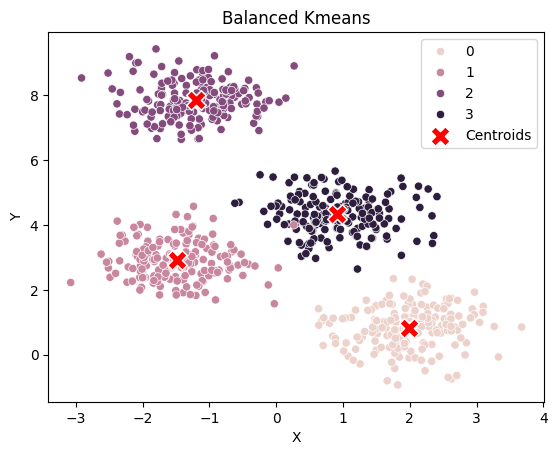

In [66]:
sns.scatterplot(data=df, x=df.col1, y=df.col2, hue=Kmeans_my_balanced2.labels_)

centroids = Kmeans_my_balanced2.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.title('Balanced Kmeans')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [67]:
unique, counts = np.unique(Kmeans_my_balanced2.labels_, return_counts=True)
counts

array([175, 175, 175, 175])

In [68]:
#Performance analysis
randscore_balanced_kmeans_iter1 = adjusted_rand_score(cluster_assignments, Kmeans_my_balanced.labels_)
randscore_balanced_kmeans_normal = adjusted_rand_score(cluster_assignments, Kmeans_my_balanced2.labels_)
print("Adjusted Rand Index with iteration 1:", randscore_balanced_kmeans_iter1)
print("Adjusted Rand Index with normal parameters:", randscore_balanced_kmeans_normal)

Adjusted Rand Index with iteration 1: 0.15562505277973257
Adjusted Rand Index with normal parameters: 0.9923918367346939


### Observation from balanced Kmeans

- When number of iteration are less, then also we see that all clusters have an equal number of points. Observed above with max_iter = 1.
- Adjusted rand score for iteration 1 is printed but doesnot signify anything as I did run it for 1 iteration just to check if number of labels in cluster are balanced or not.
- Not much different from normal Kmeans, because number of points in each cluster are same in the data that we created.